In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myntra-products-dataset/myntra202305041052.csv


In [2]:
pd.set_option("display.max_rows", 50)

In [3]:
df = pd.read_csv(r"/kaggle/input/myntra-products-dataset/myntra202305041052.csv", nrows = 20000)
df.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


### Dropping unnecessary columns

In [4]:
df.drop(["id", "img", "purl", "asin"], axis = 1, inplace = True)

In [5]:
df.head()

,name,price,mrp,rating,ratingTotal,discount,seller
0,Men Solid Oversized Cotton,532,1299.0,4.1,5300,59,Difference of Opinion
1,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster
2,Women Pure Cotton T-shirt,551,1199.0,4.5,3400,54,DILLINGER
3,Typography Print T-shirt,296,1099.0,4.0,18400,73,Huetrap
4,Printed Round Neck Pure Cotton T-shirt,494,899.0,4.2,3800,45,Roadster


In [6]:
df.shape

(20000, 7)

## checking the type of features

In [7]:
df.info()

# below we are able to see that the name and seller columns are categorical and others and numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         20000 non-null  object 
 1   price        20000 non-null  int64  
 2   mrp          20000 non-null  float64
 3   rating       20000 non-null  float64
 4   ratingTotal  20000 non-null  int64  
 5   discount     20000 non-null  int64  
 6   seller       20000 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.1+ MB


In [8]:
df.name.nunique()
# we have 10816 unique items

10816

In [9]:
df.seller.nunique()
# We have a total of 1374 sellers

1374

In [10]:
# we have a lot of sellers as well as products so we will group the data based on seller column as then analyse 
# for each seller

In [11]:
# Due to very large number of sellers, I am picking up some famous sellers that I know
sellers = df["seller"].value_counts().sort_values(ascending = False).index[:10]

In [12]:
sellers

Index(['Roadster', 'H&M', 'maxima', 'HRX by Hrithik Roshan', 'Sztori', 'M.A.C',
       'Homesake', 'WROGN', 'JUMPLITE', 'Fleurt'],
      dtype='object', name='seller')

In [13]:
# group the data based on seller columns
grouped_df = df.groupby("seller")

In [14]:
# creating a new dataframe using these sellers

df_new = grouped_df.get_group("Roadster")

for i in sellers[1:]:
    df_new = pd.concat([df_new, grouped_df.get_group(i)])

In [15]:
df_new.reset_index(drop = "index")

,name,price,mrp,rating,ratingTotal,discount,seller
0,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster
1,Printed Round Neck Pure Cotton T-shirt,494,899.0,4.2,3800,45,Roadster
2,Polo Collar Cotton Pure Cotton T-shirt,449,899.0,4.1,10500,50,Roadster
3,Printed Round Neck Pure Cotton T-shirt,399,799.0,4.1,5600,50,Roadster
4,Printed Round Neck Pure Cotton T-shirt,419,699.0,4.1,6900,40,Roadster
...,...,...,...,...,...,...,...
2645,Women Pack of 3 Hipster Briefs,2495,2495.0,0.0,0,0,Fleurt
2646,Baby Doll,2145,2145.0,0.0,0,0,Fleurt
2647,Baby Doll,2245,2245.0,0.0,0,0,Fleurt
2648,Women Pack Of 8 Briefs,4495,4495.0,0.0,0,0,Fleurt


## Finally I have prepared the data to be analysed

In [16]:
roadster_df = df_new[df_new["seller"] == "Roadster"]

In [17]:
roadster_df.head(50)

,name,price,mrp,rating,ratingTotal,discount,seller
1,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster
4,Printed Round Neck Pure Cotton T-shirt,494,899.0,4.2,3800,45,Roadster
6,Polo Collar Cotton Pure Cotton T-shirt,449,899.0,4.1,10500,50,Roadster
9,Printed Round Neck Pure Cotton T-shirt,399,799.0,4.1,5600,50,Roadster
10,Printed Round Neck Pure Cotton T-shirt,419,699.0,4.1,6900,40,Roadster
11,Longline T-shirt with Raw Edge,463,799.0,3.9,11600,42,Roadster
14,Time Travlr Sleveless Pure Cotton T-shirt,124,499.0,4.1,5100,75,Roadster
16,Men Striped Polo Collar T-shirt,349,1399.0,4.1,3800,75,Roadster
17,Henley Neck T-shirt,274,499.0,4.2,3600,45,Roadster
18,Typography Cotton T-shirt,299,599.0,4.0,29100,50,Roadster


## Univariate analysis of each column

In [18]:
roadster_df.columns

Index(['name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount', 'seller'], dtype='object')

<Axes: >

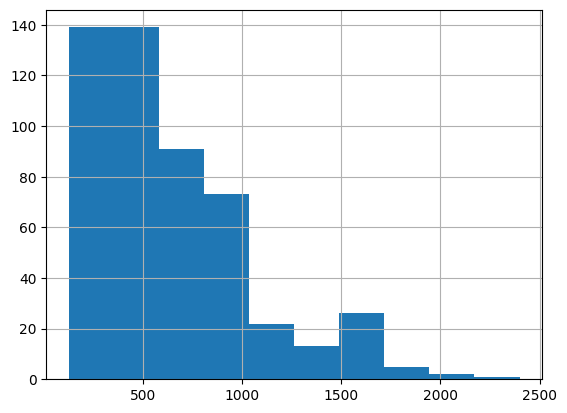

In [19]:
roadster_df["price"].hist(bins=10)

In [20]:
roadster_df["price"].describe()

count     511.000000
mean      643.555773
std       413.453106
min       124.000000
25%       349.000000
50%       519.000000
75%       849.000000
max      2399.000000
Name: price, dtype: float64

In [21]:
roadster_df["rating"].describe()

count    511.000000
mean       3.630920
std        1.211604
min        0.000000
25%        3.800000
50%        4.000000
75%        4.200000
max        4.800000
Name: rating, dtype: float64

In [22]:
roadster_df[(roadster_df["ratingTotal"] == 0) & (roadster_df["rating"] == 0)].shape

(49, 7)

In [23]:
#we are able to see that 49 products are not rated at all which means that these products are not much purchased by customers

In [24]:
roadster_df[(roadster_df["ratingTotal"] == 0) & (roadster_df["rating"] == 0)]

,name,price,mrp,rating,ratingTotal,discount,seller
71,Women Extended Sleeves T-shirt,799,799.0,0.0,0,0,Roadster
551,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
553,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
561,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
564,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
572,Printed Laptop Backpack,999,3999.0,0.0,0,75,Roadster
574,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
2160,Women Colourblocke Sports Shoe,1799,4999.0,0.0,0,64,Roadster
2174,Women Colourblocke Sports Shoe,1698,4590.0,0.0,0,63,Roadster
3888,Women Walking Sports Shoe,1799,4999.0,0.0,0,64,Roadster


In [25]:
# Lets see whether this is because less amount of discount on the product

roadster_df["discount"].describe()

count     511.000000
mean       72.332681
std       112.104096
min         0.000000
25%        50.000000
50%        55.000000
75%        65.000000
max      1190.000000
Name: discount, dtype: float64

In [26]:
# our assumption that the lower ratings/sale is due to lower discount is wrong as the average discount and the discount
# over this products is in the same range

In [27]:
roadster_df[(roadster_df["ratingTotal"] == 0) & (roadster_df["rating"] == 0)]

,name,price,mrp,rating,ratingTotal,discount,seller
71,Women Extended Sleeves T-shirt,799,799.0,0.0,0,0,Roadster
551,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
553,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
561,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
564,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
572,Printed Laptop Backpack,999,3999.0,0.0,0,75,Roadster
574,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
2160,Women Colourblocke Sports Shoe,1799,4999.0,0.0,0,64,Roadster
2174,Women Colourblocke Sports Shoe,1698,4590.0,0.0,0,63,Roadster
3888,Women Walking Sports Shoe,1799,4999.0,0.0,0,64,Roadster


In [28]:
# Lets see whether the lower sale is due to higher mrp
roadster_df["mrp"].describe()

count     511.000000
mean     1527.608611
std      1116.893322
min       399.000000
25%       799.000000
50%      1249.000000
75%      1799.000000
max      7999.000000
Name: mrp, dtype: float64

In [29]:
# Seems like we are are on the right track
roadster_df[roadster_df["mrp"] > 3000]

,name,price,mrp,rating,ratingTotal,discount,seller
551,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
553,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
561,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
564,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
572,Printed Laptop Backpack,999,3999.0,0.0,0,75,Roadster
574,Backpack with Rain Cover,999,3999.0,0.0,0,75,Roadster
2160,Women Colourblocke Sports Shoe,1799,4999.0,0.0,0,64,Roadster
2174,Women Colourblocke Sports Shoe,1698,4590.0,0.0,0,63,Roadster
3888,Women Walking Sports Shoe,1799,4999.0,0.0,0,64,Roadster
5611,Women Colourblocke Sports Shoe,1698,4590.0,0.0,0,63,Roadster


In [30]:
# most of the unrated products are higher in mrp
# we can get an understanding the segment of people that are shopping on myntra

In [31]:
# Lets see how much profit does Roadster make on an average

sum(roadster_df["mrp"] - roadster_df["price"])/sum(roadster_df["mrp"]) * 100

57.871684635566126

In [32]:
# From the above statement we are able to see that Roadster makes average profit of 57% behind sale of their products
# Thats a very big margin

In [33]:
roadster_df.head(10)

,name,price,mrp,rating,ratingTotal,discount,seller
1,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster
4,Printed Round Neck Pure Cotton T-shirt,494,899.0,4.2,3800,45,Roadster
6,Polo Collar Cotton Pure Cotton T-shirt,449,899.0,4.1,10500,50,Roadster
9,Printed Round Neck Pure Cotton T-shirt,399,799.0,4.1,5600,50,Roadster
10,Printed Round Neck Pure Cotton T-shirt,419,699.0,4.1,6900,40,Roadster
11,Longline T-shirt with Raw Edge,463,799.0,3.9,11600,42,Roadster
14,Time Travlr Sleveless Pure Cotton T-shirt,124,499.0,4.1,5100,75,Roadster
16,Men Striped Polo Collar T-shirt,349,1399.0,4.1,3800,75,Roadster
17,Henley Neck T-shirt,274,499.0,4.2,3600,45,Roadster
18,Typography Cotton T-shirt,299,599.0,4.0,29100,50,Roadster


In [34]:
# Lets see the price range of the products of Roadster
roadster_df["price"].describe()

count     511.000000
mean      643.555773
std       413.453106
min       124.000000
25%       349.000000
50%       519.000000
75%       849.000000
max      2399.000000
Name: price, dtype: float64

In [35]:
# we can infer that the minimum price of roadster product ranges from 124 to 2399 maximum

In [36]:
roadster_df["name"].nunique()

200

In [37]:
# Roadster has over 200 products listed on myntra

In [38]:
# Lets see the highest rated products of Roadster
roadster_df.sort_values(by = "rating", ascending = False).head(5)

,name,price,mrp,rating,ratingTotal,discount,seller
16656,Discovery Unisex Rucksack,2399,7999.0,4.8,47,70,Roadster
17456,Pure Cotton T-shirt,299,599.0,4.7,22,50,Roadster
16035,Tie and Dye Crop Boxy T-shirt,719,1199.0,4.7,12,40,Roadster
17777,Cotton Boxy Super Crop T-shirt,299,499.0,4.5,56,40,Roadster
12533,Solid Top,571,1299.0,4.5,26,56,Roadster


In [39]:
# The top 5 rated products by roadster are rucksack, cotton tshirt, boxy tshirt, crop tshirt, solid top

In [40]:
# Lets see the least rated 5 products by roadster
roadster_df.sort_values(by = "rating", ascending = True).head(5)

,name,price,mrp,rating,ratingTotal,discount,seller
2160,Women Colourblocke Sports Shoe,1799,4999.0,0.0,0,64,Roadster
3888,Women Walking Sports Shoe,1799,4999.0,0.0,0,64,Roadster
7412,Women Mesh Walking Shoes,1698,4590.0,0.0,0,63,Roadster
7401,Women Walking Sports Shoes,1698,4590.0,0.0,0,63,Roadster
9133,Women Walking Sports Shoe,1799,4999.0,0.0,0,64,Roadster


In [41]:
# we can see that the shoes segment for womens by roadster is not performing as good as its tshirt segment

In [42]:
# lets top 5 products purchased by people
roadster_df.sort_values(by = "ratingTotal", ascending = False).head(10)

,name,price,mrp,rating,ratingTotal,discount,seller
1712,Typography Cotton T-shirt,299,599.0,4.0,29100,50,Roadster
18,Typography Cotton T-shirt,299,599.0,4.0,29100,50,Roadster
8711,Graphic T-shirt,299,499.0,4.1,26800,40,Roadster
8786,Graphic T-shirt,299,499.0,4.1,26800,40,Roadster
1,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster
1701,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster
714,Men Slim Fit Jeans,1699,1699.0,3.5,22600,0,Roadster
3498,Pure Cotton T-shirt,299,599.0,4.2,22200,50,Roadster
3503,Women Cotton Pure Cotton T-shirt,239,599.0,4.0,18900,60,Roadster
5953,Men Skinny Fit Jeans,999,2499.0,3.9,16600,60,Roadster


In [43]:
# We can see that in this also the Tshirt and jeans are mostly purchased by people and rated
# We can conclude that roadster is doing good in the tshirt segment
# the company should focus on shoes segment as it is underperforming as compared to tshirts

# Lets see how mrp affects the rating

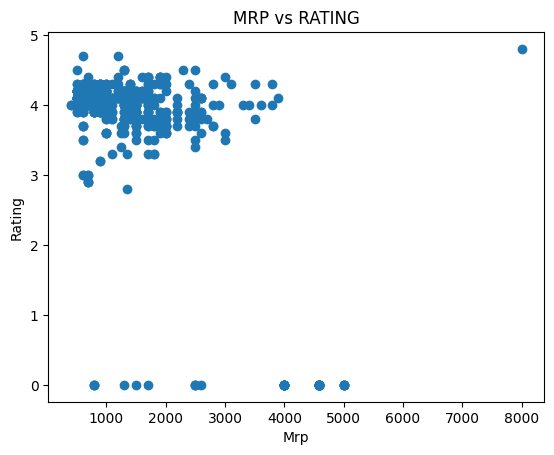

In [44]:
plt.title("MRP vs RATING")
plt.xlabel("Mrp")
plt.ylabel("Rating")

plt.scatter(roadster_df["mrp"], roadster_df["rating"])

In [45]:
# We are able to see from the above graph that most of the people are purchasing products below 4000 and even the rating for those products are really good
# Maybe people are afraid to pay higher prices on products on an online platform - due to trust issues
# majority of products range between 0 rs to 4000 rs

# Lets see how discount affects the rating

In [46]:
# discount should be converted to percentage in order to bring into same scale

In [47]:
roadster_df["discount_pct"] = (roadster_df["discount"]/roadster_df["mrp"]) * 100

/tmp/ipykernel_32/144738857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roadster_df["discount_pct"] = (roadster_df["discount"]/roadster_df["mrp"]) * 100


In [48]:
roadster_df

,name,price,mrp,rating,ratingTotal,discount,seller,discount_pct
1,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster,9.018036
4,Printed Round Neck Pure Cotton T-shirt,494,899.0,4.2,3800,45,Roadster,5.005562
6,Polo Collar Cotton Pure Cotton T-shirt,449,899.0,4.1,10500,50,Roadster,5.561735
9,Printed Round Neck Pure Cotton T-shirt,399,799.0,4.1,5600,50,Roadster,6.257822
10,Printed Round Neck Pure Cotton T-shirt,419,699.0,4.1,6900,40,Roadster,5.722461
...,...,...,...,...,...,...,...,...
19965,Men Slim Fit Jeans,719,1799.0,4.0,808,60,Roadster,3.335186
19968,Men Regular Fit Regular Trousers,674,1499.0,3.8,416,55,Roadster,3.669113
19971,Men Super Skinny Fit Jeans,474,1899.0,3.9,1100,75,Roadster,3.949447
19989,Men Cotton Sustainable Chinos,769,2199.0,3.9,1500,65,Roadster,2.955889


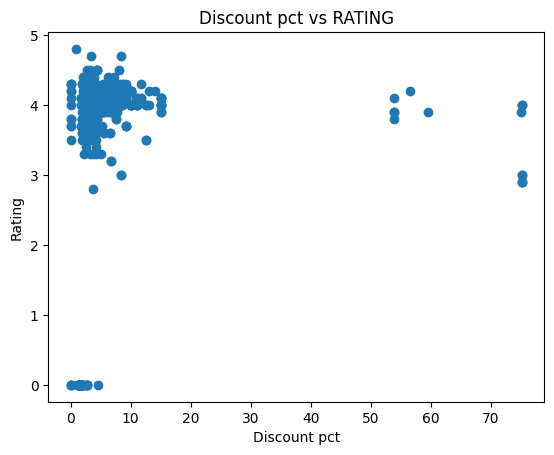

In [49]:
plt.title("Discount pct vs RATING")
plt.xlabel("Discount pct")
plt.ylabel("Rating")

plt.scatter(roadster_df["discount_pct"], roadster_df["rating"])

In [50]:
# The range of products which provide discount upto 20 % are highly rated by people
# Also people have highly rated the products which provide discount of minimum 50%

In [51]:
roadster_df.head()

,name,price,mrp,rating,ratingTotal,discount,seller,discount_pct
1,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster,9.018036
4,Printed Round Neck Pure Cotton T-shirt,494,899.0,4.2,3800,45,Roadster,5.005562
6,Polo Collar Cotton Pure Cotton T-shirt,449,899.0,4.1,10500,50,Roadster,5.561735
9,Printed Round Neck Pure Cotton T-shirt,399,799.0,4.1,5600,50,Roadster,6.257822
10,Printed Round Neck Pure Cotton T-shirt,419,699.0,4.1,6900,40,Roadster,5.722461


# Since the tshirt segment of roadster has higher customer response, lets analyse the tshirt data

In [52]:
tshirt_roadster = roadster_df[roadster_df["name"].str.contains("T-shirt")]

In [53]:
tshirt_roadster.head(50)

,name,price,mrp,rating,ratingTotal,discount,seller,discount_pct
1,Men Cotton Pure Cotton T-shirt,274,499.0,4.2,25400,45,Roadster,9.018036
4,Printed Round Neck Pure Cotton T-shirt,494,899.0,4.2,3800,45,Roadster,5.005562
6,Polo Collar Cotton Pure Cotton T-shirt,449,899.0,4.1,10500,50,Roadster,5.561735
9,Printed Round Neck Pure Cotton T-shirt,399,799.0,4.1,5600,50,Roadster,6.257822
10,Printed Round Neck Pure Cotton T-shirt,419,699.0,4.1,6900,40,Roadster,5.722461
11,Longline T-shirt with Raw Edge,463,799.0,3.9,11600,42,Roadster,5.256571
14,Time Travlr Sleveless Pure Cotton T-shirt,124,499.0,4.1,5100,75,Roadster,15.030060
16,Men Striped Polo Collar T-shirt,349,1399.0,4.1,3800,75,Roadster,5.360972
17,Henley Neck T-shirt,274,499.0,4.2,3600,45,Roadster,9.018036
18,Typography Cotton T-shirt,299,599.0,4.0,29100,50,Roadster,8.347245


In [54]:
# Lets check the mrp range of the tshirts
tshirt_roadster["mrp"].describe()

count     304.000000
mean      909.197368
std       331.903144
min       399.000000
25%       599.000000
50%       849.000000
75%      1099.000000
max      1999.000000
Name: mrp, dtype: float64

In [55]:
# We are able to see that the tshirts are between descent range of mrp ranging 399 rs to 1999 rs

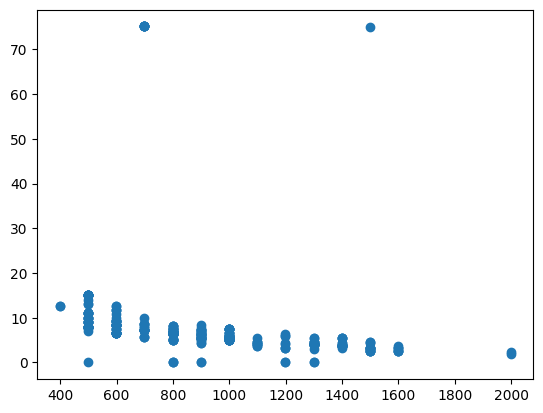

In [57]:
plt.scatter(tshirt_roadster["mrp"], tshirt_roadster["discount_pct"])

In [58]:
# We are able to see that various tshirts are providing discount within the range of 20pct